# **Load Data**

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Mt-Gambier_SA.csv')

# **General characteristics of the data**

In [ ]:
#shape of data
data.shape

(97000, 12)

In [ ]:
data

,Unnamed: 0,date,year,month,day,hour,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh)
0,6,1990-01-01,1990,Jan,Mon,6,234,503,78,12.1406,9.7,498.632
1,7,1990-01-01,1990,Jan,Mon,7,448,723,91,13.3250,10.1,720.409
2,8,1990-01-01,1990,Jan,Mon,8,699,959,71,13.3094,9.3,946.154
3,9,1990-01-01,1990,Jan,Mon,9,880,1016,73,13.9375,9.1,987.273
4,10,1990-01-01,1990,Jan,Mon,10,1009,1031,85,14.1141,8.0,1000.230
...,...,...,...,...,...,...,...,...,...,...,...,...
96995,8750,2014-12-31,2014,Dec,Wed,14,903,971,94,14.4875,8.8,925.713
96996,8751,2014-12-31,2014,Dec,Wed,15,746,950,76,14.2563,8.8,920.625
96997,8752,2014-12-31,2014,Dec,Wed,16,545,865,69,13.2500,8.6,854.471
96998,8753,2014-12-31,2014,Dec,Wed,17,308,599,80,13.0094,9.0,605.375


In [ ]:
# Displaying concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97000 entries, 0 to 96999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          97000 non-null  int64  
 1   date                97000 non-null  object 
 2   year                97000 non-null  int64  
 3   month               97000 non-null  object 
 4   day                 97000 non-null  object 
 5   hour                97000 non-null  int64  
 6   GHI (W/m2)          97000 non-null  int64  
 7   DNI (W/m2)          97000 non-null  int64  
 8    DHI (W/m2)         97000 non-null  int64  
 9   Wet bulb temp (C)   97000 non-null  float64
 10  Dew point temp (C)  97000 non-null  float64
 11  Energy (kWh)        97000 non-null  float64
dtypes: float64(3), int64(6), object(3)
memory usage: 8.9+ MB


In [ ]:
# Calculating the number of missing values in each column
data.isnull().sum()

,0
Unnamed: 0,0
date,0
year,0
month,0
day,0
hour,0
GHI (W/m2),0
DNI (W/m2),0
DHI (W/m2),0
Wet bulb temp (C),0


# **Data preprocessing**

In [ ]:
# Dropping the column 'Unnamed: 0' from the DataFrame
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Setting the 'date' column as the index of the DataFrame
data.set_index('date', inplace=True)

In [ ]:
# print date column
print(data.index)

DatetimeIndex(['1990-01-01', '1990-01-01', '1990-01-01', '1990-01-01',
               '1990-01-01', '1990-01-01', '1990-01-01', '1990-01-01',
               '1990-01-01', '1990-01-01',
               ...
               '2014-12-31', '2014-12-31', '2014-12-31', '2014-12-31',
               '2014-12-31', '2014-12-31', '2014-12-31', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='date', length=97000, freq=None)


In [ ]:
# in date print unique values in year, month, date
print(data.index.year.unique())
print(data.index.month.unique())
print(data.index.day.unique())

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014],
      dtype='int32', name='date')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='date')
Index([ 1, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype='int32', name='date')


In [ ]:
df=data

In [ ]:
# Generate a complete date range
full_date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')

# Identify missing dates
missing_dates = full_date_range.difference(df.index)

# Output missing dates
if missing_dates.empty:
    print("No missing dates.")
else:
    print(f"Missing dates: {missing_dates}")

Missing dates: DatetimeIndex(['1992-02-29', '1996-02-29', '2000-02-29', '2004-02-29',
               '2008-02-29', '2012-02-29'],
              dtype='datetime64[ns]', freq=None)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97000 entries, 1990-01-01 to 2014-12-31
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                97000 non-null  int64  
 1   month               97000 non-null  object 
 2   day                 97000 non-null  object 
 3   hour                97000 non-null  int64  
 4   GHI (W/m2)          97000 non-null  int64  
 5   DNI (W/m2)          97000 non-null  int64  
 6    DHI (W/m2)         97000 non-null  int64  
 7   Wet bulb temp (C)   97000 non-null  float64
 8   Dew point temp (C)  97000 non-null  float64
 9   Energy (kWh)        97000 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 8.1+ MB


In [ ]:
print(data.columns)

Index(['year', 'month', 'day', 'hour', 'GHI (W/m2)', 'DNI (W/m2)',
       ' DHI (W/m2)', 'Wet bulb temp (C)', 'Dew point temp (C)',
       'Energy (kWh)'],
      dtype='object')


In [ ]:
# Remove leading/trailing spaces from all column names
data.columns = data.columns.str.strip()

print(data.columns)

Index(['year', 'month', 'day', 'hour', 'GHI (W/m2)', 'DNI (W/m2)',
       'DHI (W/m2)', 'Wet bulb temp (C)', 'Dew point temp (C)',
       'Energy (kWh)'],
      dtype='object')


# **Box plots**

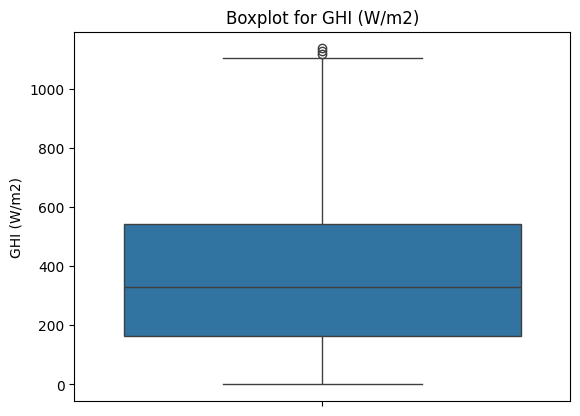

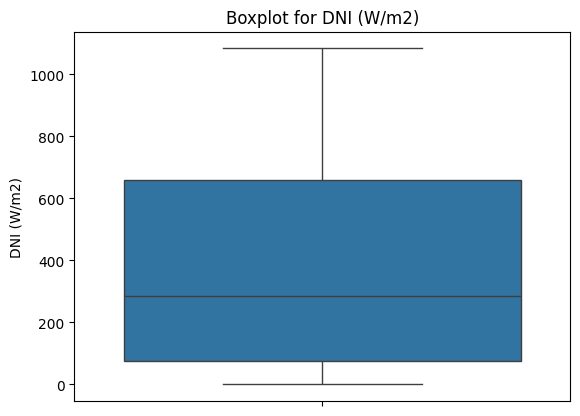

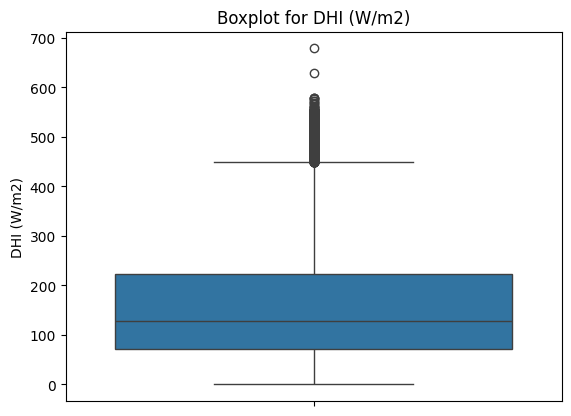

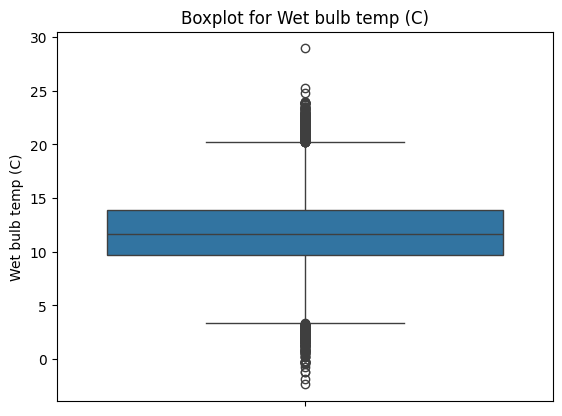

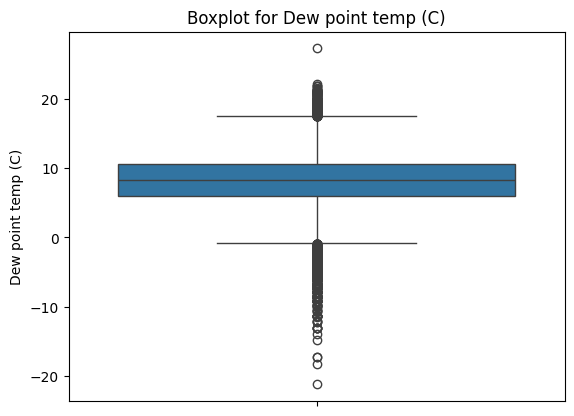

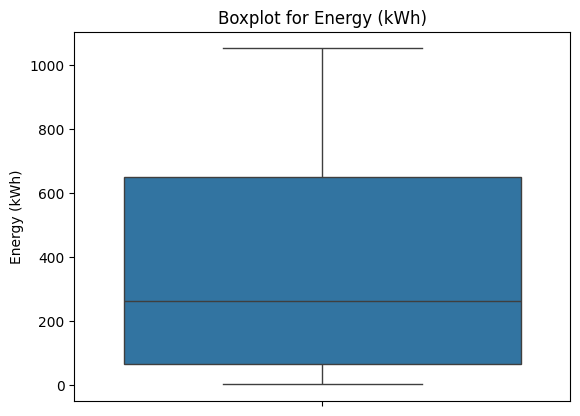

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Outliers Detection for Numeric Columns
numeric_cols = ['GHI (W/m2)', 'DNI (W/m2)', 'DHI (W/m2)', 'Wet bulb temp (C)',
                'Dew point temp (C)', 'Energy (kWh)']
for column in numeric_cols:
    sns.boxplot(data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

# **ADF Test**

In [ ]:
# ADF Test function
def adf_test(series, column_name):
    """
    Perform the Augmented Dickey-Fuller test on the given time series and print the results.

    Parameters:
    series (pd.Series): The time series data to be tested.
    column_name (str): The name of the column (for labeling in output).
    """
    # Perform the ADF test (drop missing values before testing)
    result = adfuller(series.dropna())

    # Output the results
    print(f"ADF Test for {column_name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    # Check if the series is stationary based on the p-value
    if result[1] < 0.05:
        print("Stationary\n")
    else:
        print("Non-stationary\n")

# Perform ADF test on 'Energy (kWh)' column
adf_test(data['Energy (kWh)'], 'Energy (kWh)')

# # Optionally, perform ADF test on other columns like 'GHI (W/m2)', 'DNI (W/m2)', etc.
# adf_test(data['GHI (W/m2)'], 'GHI (W/m2)')
# adf_test(data['DNI (W/m2)'], 'DNI (W/m2)')
# adf_test(data['DHI (W/m2)'], 'DHI (W/m2)')

ADF Test for Energy (kWh):
ADF Statistic: -28.22574955515217
p-value: 0.0
Critical Values: {'1%': -3.4304174645440244, '5%': -2.8615698182610942, '10%': -2.566785871218783}
Stationary



In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# 1. Load and Prepare the Data
df = pd.read_csv('/content/drive/MyDrive/Mt-Gambier_SA.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Ensure 'date' is in datetime format and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample to monthly frequency
monthly_data = df['Energy (kWh)'].resample('M').mean()  # Resample energy data monthly
external_features = df[['GHI (W/m2)', 'DHI (W/m2)', 'Wet bulb temp (C)']].resample('M').mean()  # Resample external features monthly

# Combine the resampled data
monthly_data = pd.DataFrame(monthly_data)
monthly_data = monthly_data.merge(external_features, left_index=True, right_index=True)

# 2. Define the ADF Test Function
def adf_test(series, column_name):
    """
    Perform the Augmented Dickey-Fuller test on the given time series and print the results.

    Parameters:
    series (pd.Series): The time series data to be tested.
    column_name (str): The name of the column (for labeling in output).
    """
    # Perform the ADF test (drop missing values before testing)
    result = adfuller(series.dropna())

    # Output the results
    print(f"ADF Test for {column_name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    # Check if the series is stationary based on the p-value
    if result[1] < 0.05:
        print(f"The series '{column_name}' is stationary.\n")
    else:
        print(f"The series '{column_name}' is non-stationary.\n")

# 3. Perform the ADF Test
print("Performing Augmented Dickey-Fuller Test on Monthly Data:\n")
adf_test(monthly_data['Energy (kWh)'], 'Energy (kWh)')

Performing Augmented Dickey-Fuller Test on Monthly Data:

ADF Test for Energy (kWh):
ADF Statistic: -2.242267084960961
p-value: 0.19126398271925904
Critical Values: {'1%': -3.4534232986669546, '5%': -2.8716994185534745, '10%': -2.5721833625116144}
The series 'Energy (kWh)' is non-stationary.



<ipython-input-16-2121400e1f5f>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Energy (kWh)'].resample('M').mean()  # Resample energy data monthly
<ipython-input-16-2121400e1f5f>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  external_features = df[['GHI (W/m2)', 'DHI (W/m2)', 'Wet bulb temp (C)']].resample('M').mean()  # Resample external features monthly


In [ ]:
df=data

# **Decomposition Plots**

<ipython-input-38-57c3927a0ba1>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Energy (kWh)'].resample('M').mean()
<ipython-input-38-57c3927a0ba1>:17: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df['Energy (kWh)'].resample('A').mean()  # 'A' stands for annual frequency


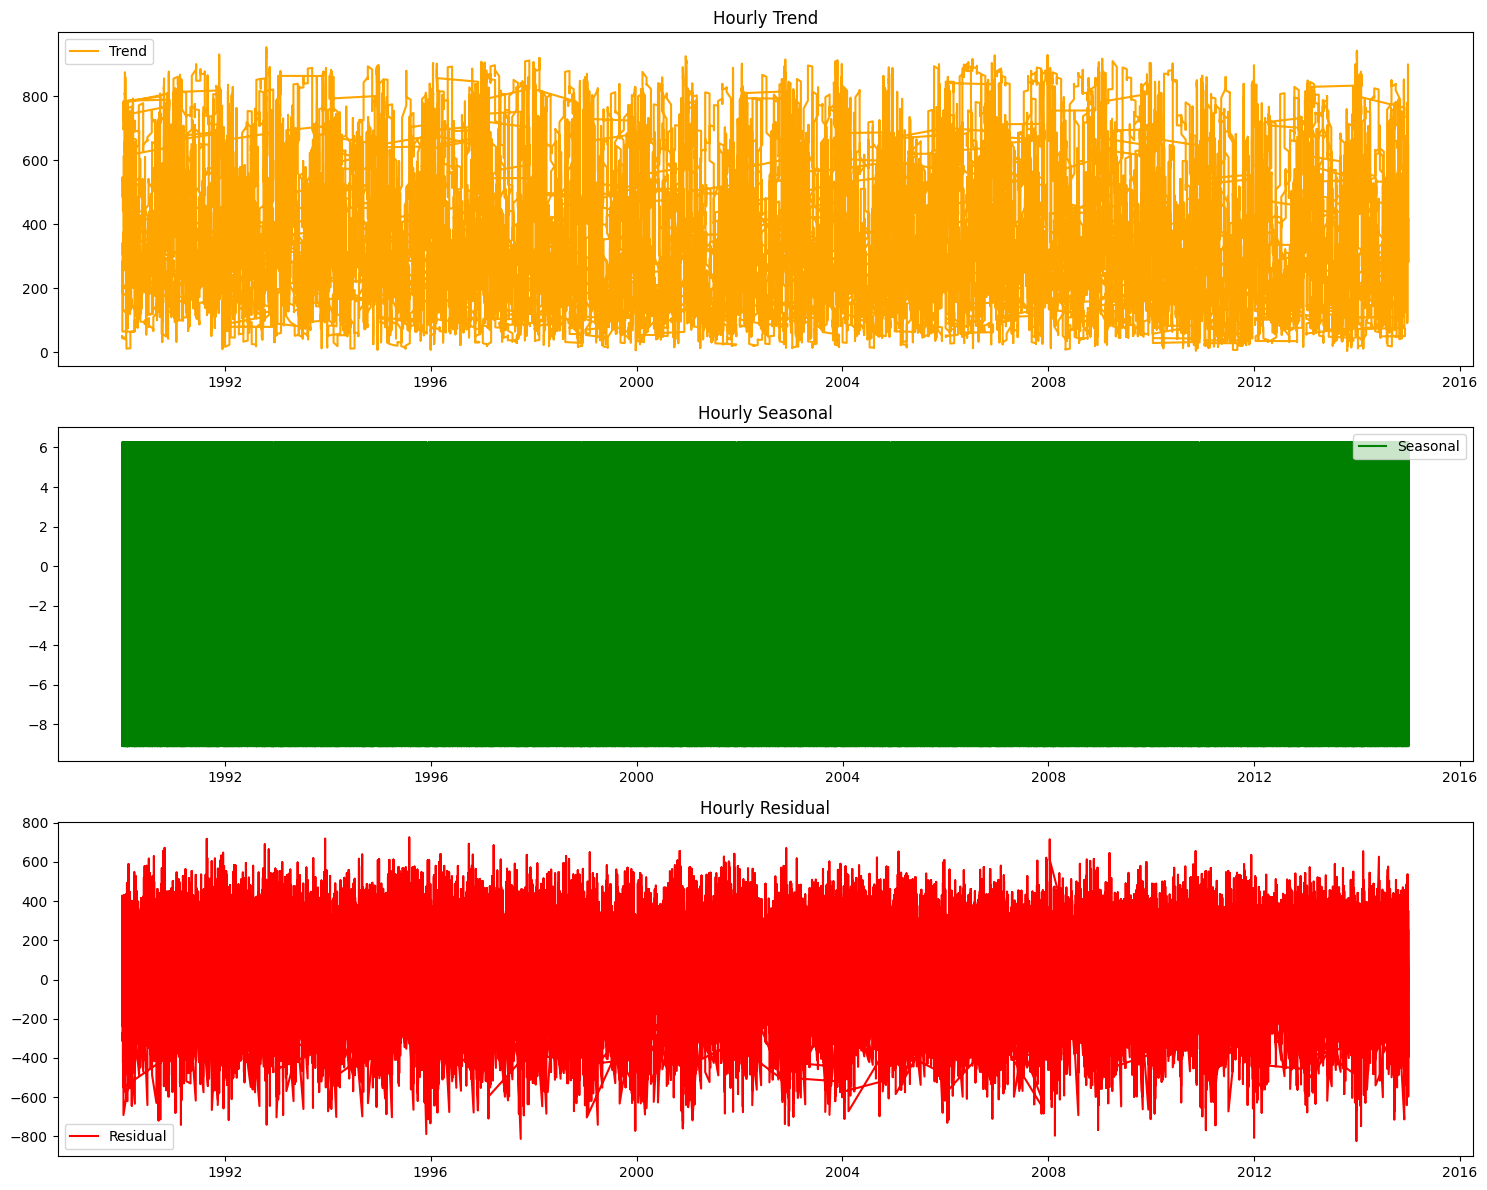

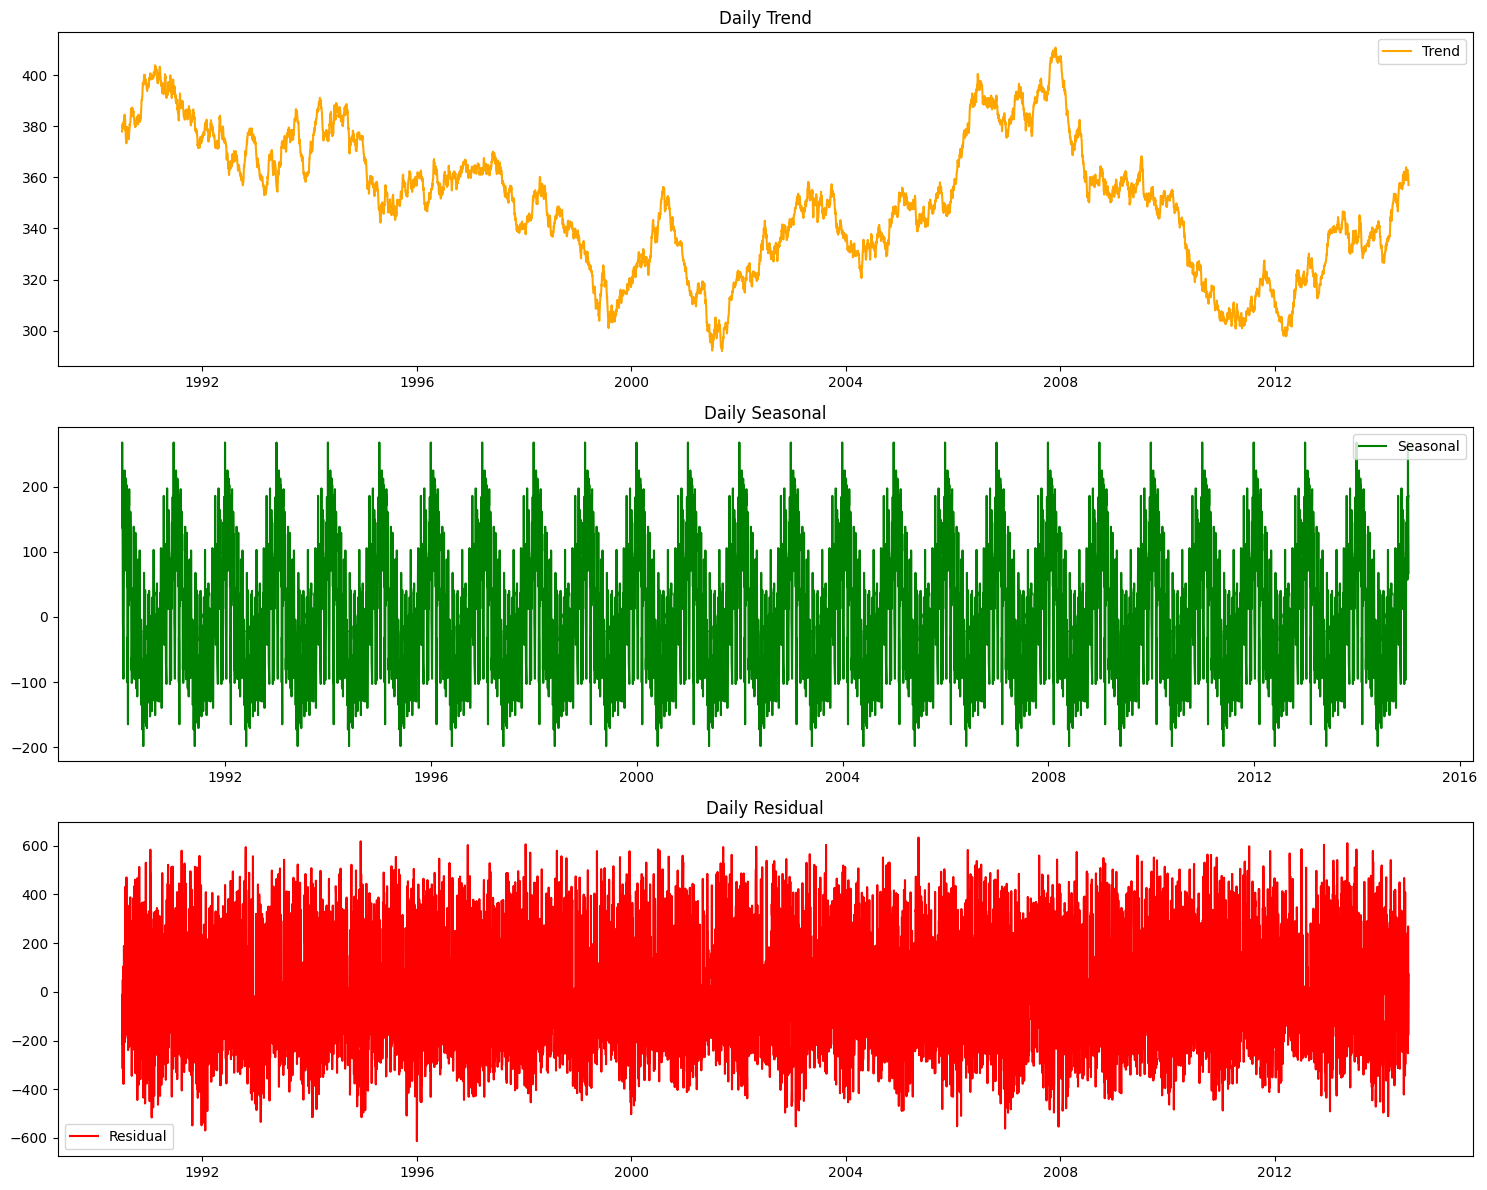

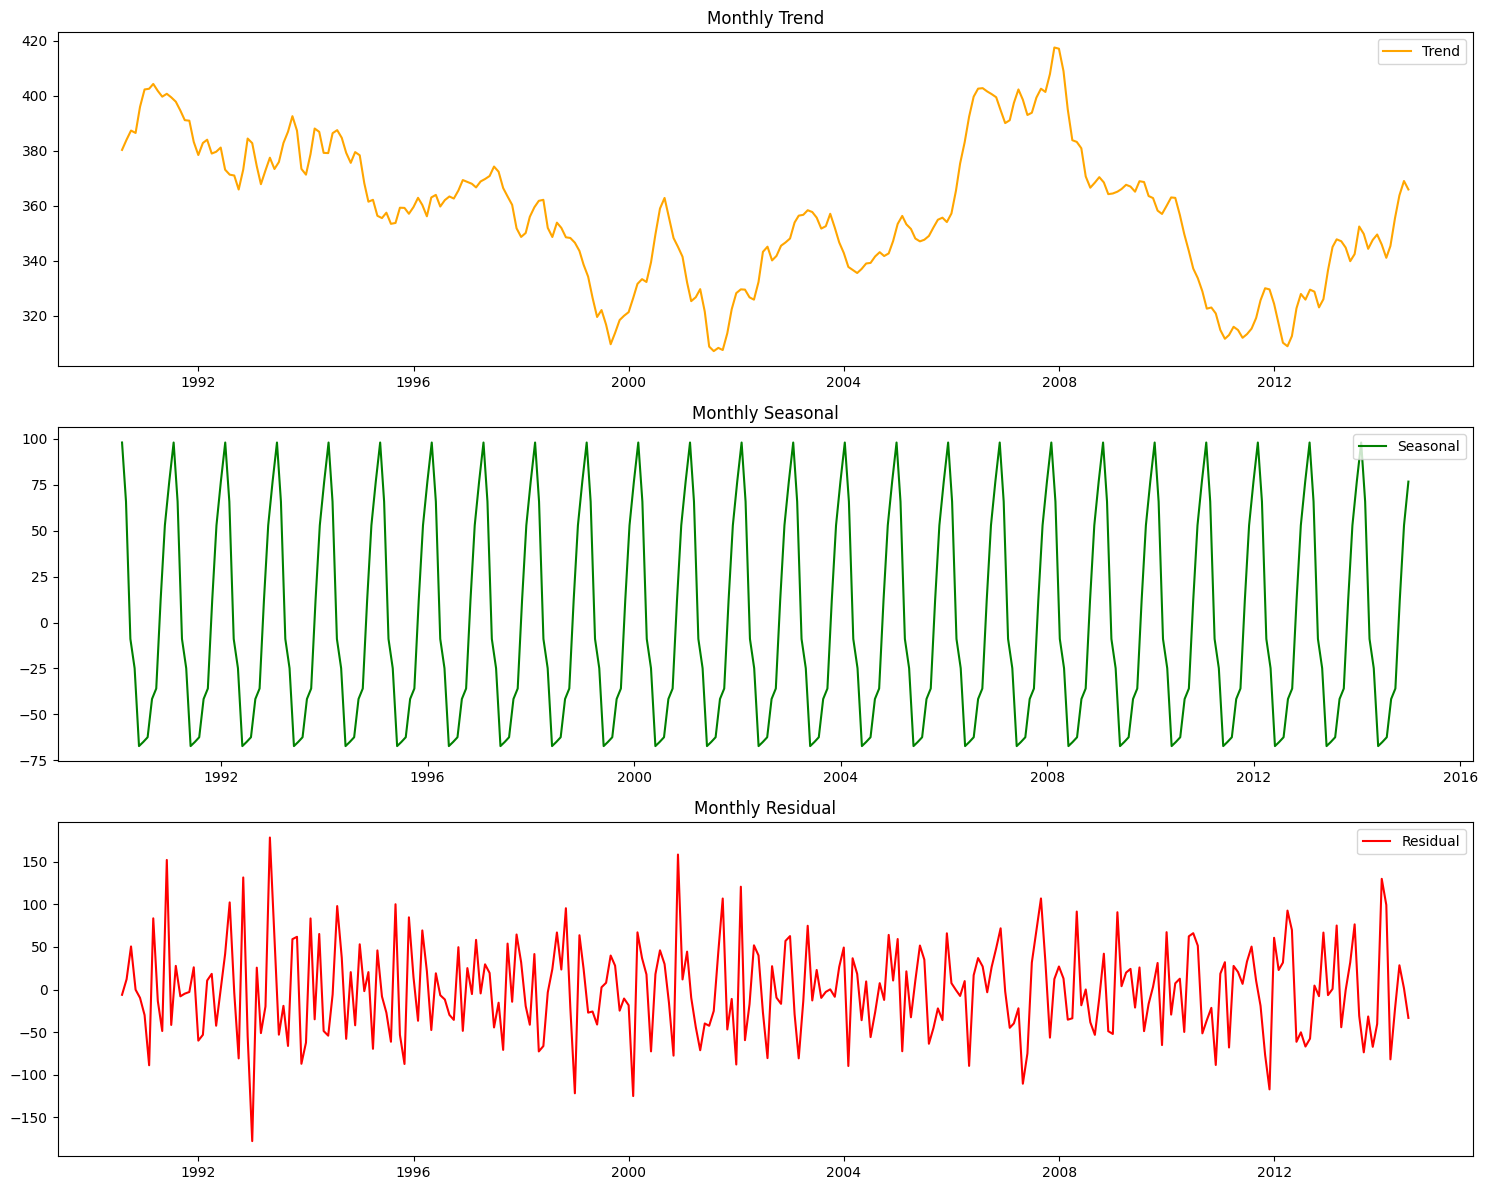

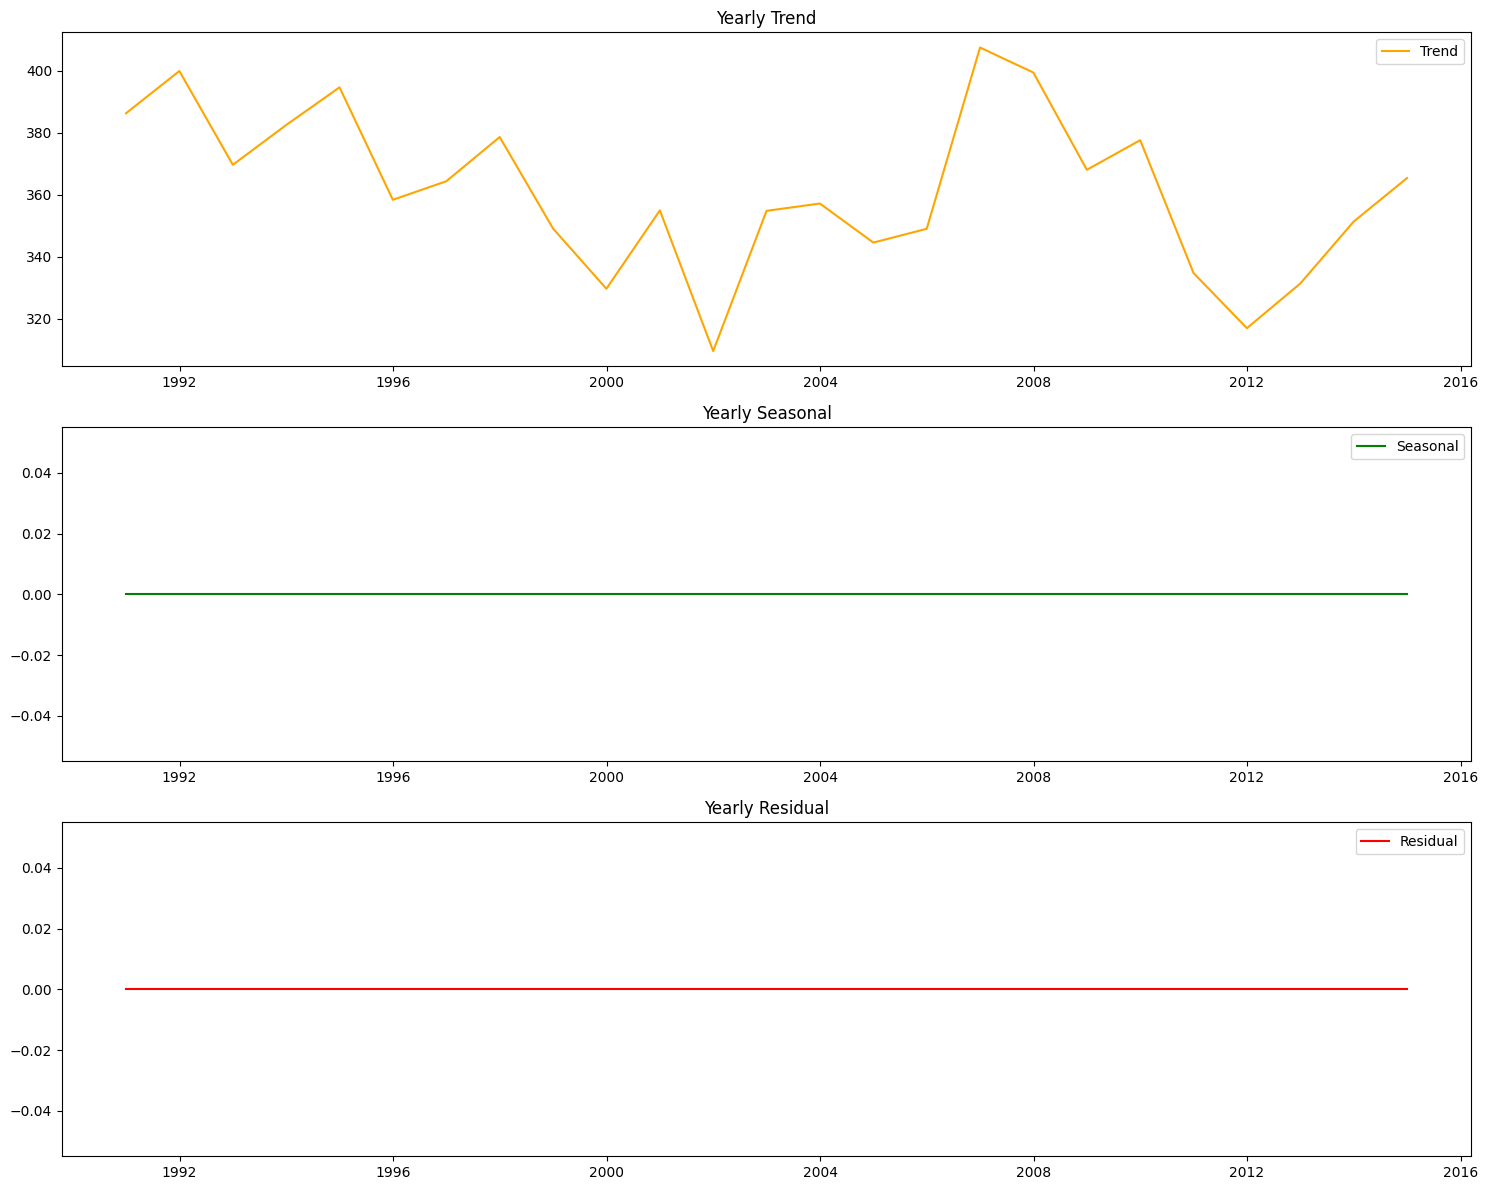

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Resample to daily frequency (taking the mean for each day)
daily_data = df['Energy (kWh)'].resample('D').mean()

# Step 2: Handle missing values by interpolation
daily_data = daily_data.interpolate(method='time')

# Step 3: Resample to monthly frequency (taking the mean for each month)
monthly_data = df['Energy (kWh)'].resample('M').mean()

# Handle missing values for monthly data (if any)
monthly_data = monthly_data.interpolate(method='time')

# Step 4: Resample to yearly frequency (taking the mean for each year)
yearly_data = df['Energy (kWh)'].resample('A').mean()  # 'A' stands for annual frequency

# Handle missing values for yearly data (if any)
yearly_data = yearly_data.interpolate(method='time')

# Step 5: Perform seasonal decomposition for hourly data (24-hour period)
decomposition_hourly = seasonal_decompose(df['Energy (kWh)'], model='additive', period=24)  # 24-hour period for hourly data

# Step 6: Perform seasonal decomposition for daily data (365-day period for yearly seasonality)
decomposition_daily = seasonal_decompose(daily_data, model='additive', period=365)

# Step 7: Perform seasonal decomposition for monthly data (12-month period for yearly seasonality)
decomposition_monthly = seasonal_decompose(monthly_data, model='additive', period=12)

# Step 8: Perform seasonal decomposition for yearly data (1-period for yearly cycle)
decomposition_yearly = seasonal_decompose(yearly_data, model='additive', period=1)

# Step 9: Plot the decomposition results for Hourly, Daily, Monthly, and Yearly

# Hourly Data Decomposition - Separate plots for trend, seasonal, and residual
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(decomposition_hourly.trend, label='Trend', color='orange')
plt.title('Hourly Trend')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(decomposition_hourly.seasonal, label='Seasonal', color='green')
plt.title('Hourly Seasonal')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(decomposition_hourly.resid, label='Residual', color='red')
plt.title('Hourly Residual')
plt.legend()

plt.tight_layout()
plt.show()

# Daily Data Decomposition - Separate plots for trend, seasonal, and residual
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(decomposition_daily.trend, label='Trend', color='orange')
plt.title('Daily Trend')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(decomposition_daily.seasonal, label='Seasonal', color='green')
plt.title('Daily Seasonal')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(decomposition_daily.resid, label='Residual', color='red')
plt.title('Daily Residual')
plt.legend()

plt.tight_layout()
plt.show()

# Monthly Data Decomposition - Separate plots for trend, seasonal, and residual
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(decomposition_monthly.trend, label='Trend', color='orange')
plt.title('Monthly Trend')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(decomposition_monthly.seasonal, label='Seasonal', color='green')
plt.title('Monthly Seasonal')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(decomposition_monthly.resid, label='Residual', color='red')
plt.title('Monthly Residual')
plt.legend()

plt.tight_layout()
plt.show()

# Yearly Data Decomposition - Separate plots for trend, seasonal, and residual
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(decomposition_yearly.trend, label='Trend', color='orange')
plt.title('Yearly Trend')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(decomposition_yearly.seasonal, label='Seasonal', color='green')
plt.title('Yearly Seasonal')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(decomposition_yearly.resid, label='Residual', color='red')
plt.title('Yearly Residual')
plt.legend()

plt.tight_layout()
plt.show()


# **Correlation Matrix**

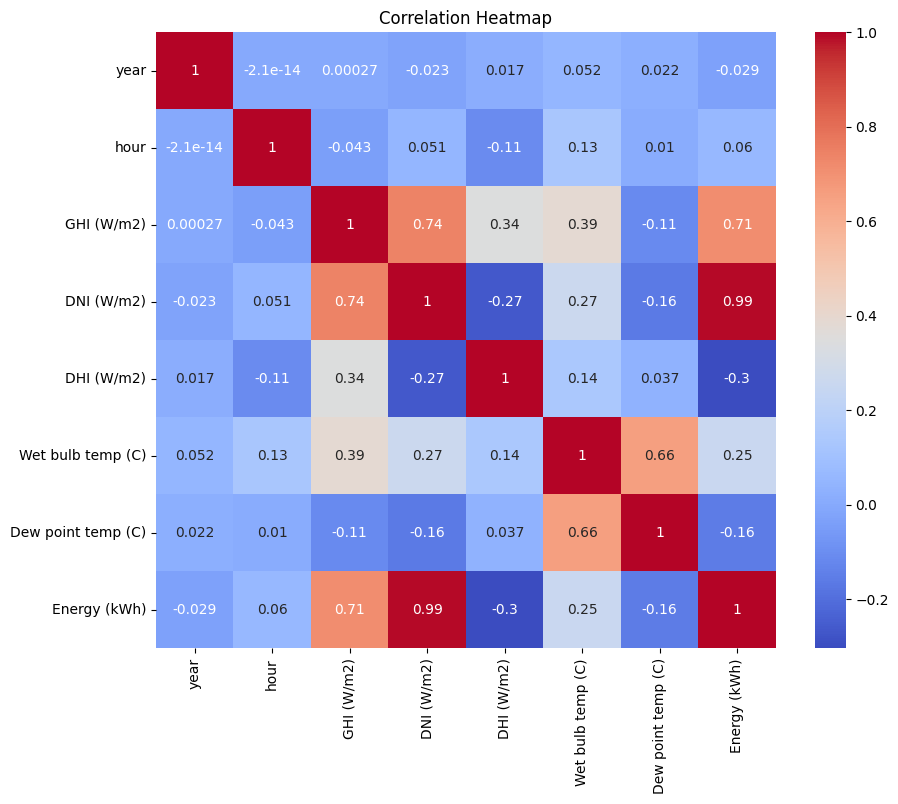

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Time Series Plot for All Key Variables
# plt.figure(figsize=(10, 6))
# # Assuming numeric_cols is a list of numeric columns you want to plot
# for col in numeric_cols:
#     plt.plot(df[col], label=col)
# plt.title("Time Series of Key Variables")
# plt.xlabel("Date")
# plt.ylabel("Values")
# plt.legend()
# plt.show()

# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# **Histograms**

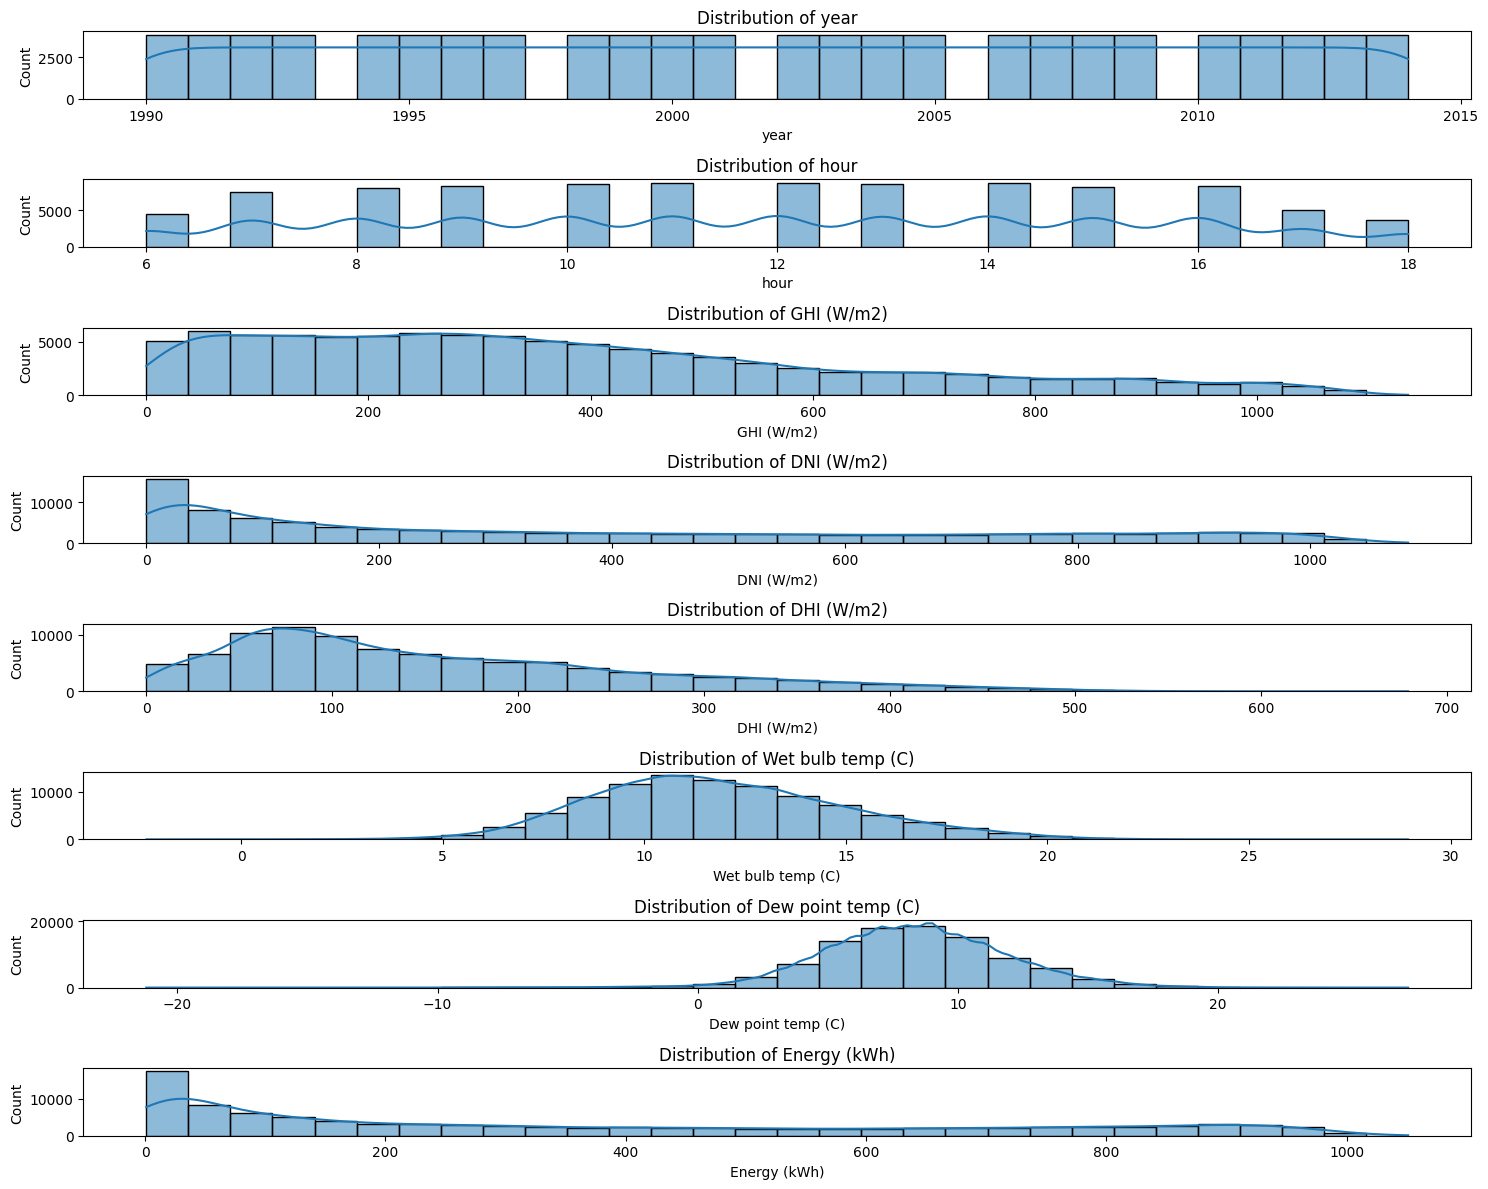

Skewness of each numeric column:
year                  0.000000
hour                  0.026270
GHI (W/m2)            0.690312
DNI (W/m2)            0.524968
DHI (W/m2)            0.911380
Wet bulb temp (C)     0.313969
Dew point temp (C)   -0.124535
Energy (kWh)          0.530240
dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns (excluding 'Date')
numeric_columns = df.select_dtypes(include=['number']).columns

# Plot distribution for all numeric columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Calculate skewness for each numeric column
skewness = df[numeric_columns].skew()
print("Skewness of each numeric column:")
print(skewness)

# **Correlation Matrix**

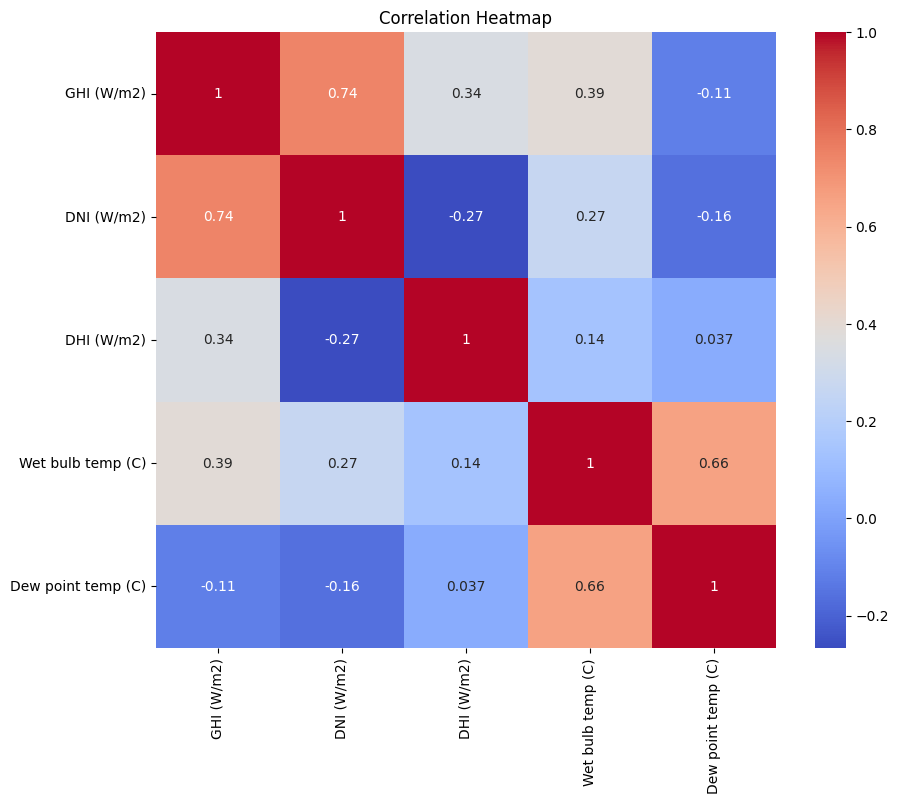

Highly correlated features:
                     GHI (W/m2)  DNI (W/m2)  DHI (W/m2)  Wet bulb temp (C)  \
GHI (W/m2)                 NaN    0.744608         NaN                NaN   
DNI (W/m2)            0.744608         NaN         NaN                NaN   
DHI (W/m2)                 NaN         NaN         NaN                NaN   
Wet bulb temp (C)          NaN         NaN         NaN                NaN   
Dew point temp (C)         NaN         NaN         NaN           0.656524   

                    Dew point temp (C)  
GHI (W/m2)                         NaN  
DNI (W/m2)                         NaN  
DHI (W/m2)                         NaN  
Wet bulb temp (C)             0.656524  
Dew point temp (C)                 NaN  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
predictor_columns = df.drop(columns=['Energy (kWh)', 'year', 'hour'])
numeric_predictors = predictor_columns.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_predictors.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Optional: Show pairs of features with correlation > 0.6 (highly correlated)
high_correlation = correlation_matrix[(correlation_matrix > 0.6) & (correlation_matrix < 1.0)]
print("Highly correlated features:\n", high_correlation)


# **VIF Calculation**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude the target variable, 'year', and 'hour' from the predictor columns
predictor_columns = df.drop(columns=['Energy (kWh)', 'year', 'hour'])  # Drop target, year, and hour

# Select only numeric columns for VIF calculation
numeric_predictors = predictor_columns.select_dtypes(include=[float, int])

# Calculate VIF for each numeric predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_predictors.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_predictors.values, i) for i in range(len(numeric_predictors.columns))]

# Print the VIF values
print(vif_data)

              Feature        VIF
0          GHI (W/m2)  20.655809
1          DNI (W/m2)  14.003263
2          DHI (W/m2)   8.630623
3   Wet bulb temp (C)  30.712000
4  Dew point temp (C)  16.613058


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Mt-Gambier_SA.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df

,date,year,month,day,hour,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh)
0,1990-01-01,1990,Jan,Mon,6,234,503,78,12.1406,9.7,498.632
1,1990-01-01,1990,Jan,Mon,7,448,723,91,13.3250,10.1,720.409
2,1990-01-01,1990,Jan,Mon,8,699,959,71,13.3094,9.3,946.154
3,1990-01-01,1990,Jan,Mon,9,880,1016,73,13.9375,9.1,987.273
4,1990-01-01,1990,Jan,Mon,10,1009,1031,85,14.1141,8.0,1000.230
...,...,...,...,...,...,...,...,...,...,...,...
96995,2014-12-31,2014,Dec,Wed,14,903,971,94,14.4875,8.8,925.713
96996,2014-12-31,2014,Dec,Wed,15,746,950,76,14.2563,8.8,920.625
96997,2014-12-31,2014,Dec,Wed,16,545,865,69,13.2500,8.6,854.471
96998,2014-12-31,2014,Dec,Wed,17,308,599,80,13.0094,9.0,605.375


## **SARIMAX Model**

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                       Energy (kWh)   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -862.664
Date:                            Fri, 22 Nov 2024   AIC                           1741.329
Time:                                    06:15:59   BIC                           1768.219
Sample:                                01-31-1990   HQIC                          1752.196
                                     - 12-31-2009                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
GHI (W/m2)            1.5996      0.062     25.732      0.000       1.478       1.721
DHI (W/m2)    

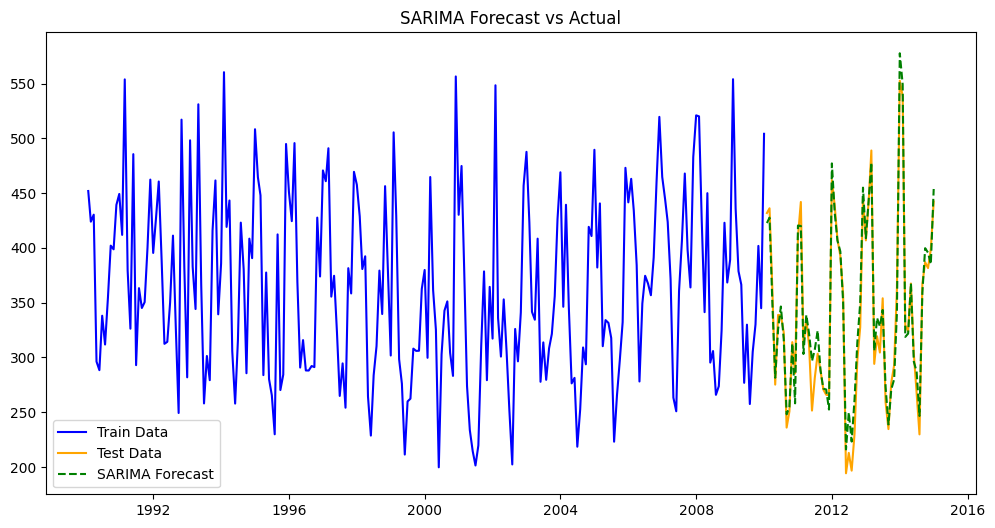

Mean Absolute Error (MAE): 12.661814044193383
Mean Squared Error (MSE): 246.8028216714998
Root Mean Squared Error (RMSE): 15.709959314762715
Mean Absolute Percentage Error (MAPE): 4.231315348666905%
R² (Coefficient of Determination): 0.9626848042986491


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Load and preprocess the data
df = pd.read_csv('/content/drive/MyDrive/Mt-Gambier_SA.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Ensure 'date' is in datetime format and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample the data to monthly frequency
monthly_data = df['Energy (kWh)'].resample('ME').mean()
external_features = df[['GHI (W/m2)', 'DHI (W/m2)',
                        'Wet bulb temp (C)']].resample('ME').mean()

# Combine the resampled external features with the energy data
monthly_data = pd.DataFrame(monthly_data)
monthly_data = monthly_data.merge(external_features, left_index=True, right_index=True)

# 80-20 Train-Test Split
train_size = int(len(monthly_data) * 0.8)
train_data = monthly_data.iloc[:train_size]
test_data = monthly_data.iloc[train_size:]

# Separate target variable and features
X_train = train_data.drop('Energy (kWh)', axis=1)
y_train = train_data['Energy (kWh)']
X_test = test_data.drop('Energy (kWh)', axis=1)
y_test = test_data['Energy (kWh)']

# Fit the SARIMAX model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
sarima_result = model.fit(disp=False)

# Summary of the model
print(sarima_result.summary())

# Forecasting
forecast = sarima_result.forecast(steps=len(test_data), exog=X_test)

# Plot Forecast vs Test Data
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Train Data', color='blue')
plt.plot(y_test, label='Test Data', color='orange')
plt.plot(forecast, label='SARIMA Forecast', color='green', linestyle='--')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()

# Metrics
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, forecast)
r2 = r2_score(y_test, forecast)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100}%")  # As percentage
print(f"R² (Coefficient of Determination): {r2}")

# **LSTM Model Hyperparameter Tuning Experimentation**

Trial 90 Complete [00h 00m 41s]
val_loss: 0.3504192531108856

Best val_loss So Far: 0.010371853597462177
Total elapsed time: 00h 20m 02s
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.4551 - val_loss: 0.1808
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1742 - val_loss: 0.1298
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1208 - val_loss: 0.0940
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0883 - val_loss: 0.0591
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0587 - val_loss: 0.0428
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0427 - val_loss: 0.0433
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0424 - val_loss: 0.0346
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0377 - val_loss: 0.0272
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0284 - val_loss: 0.0248
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0272 - val_loss: 0.0273
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━

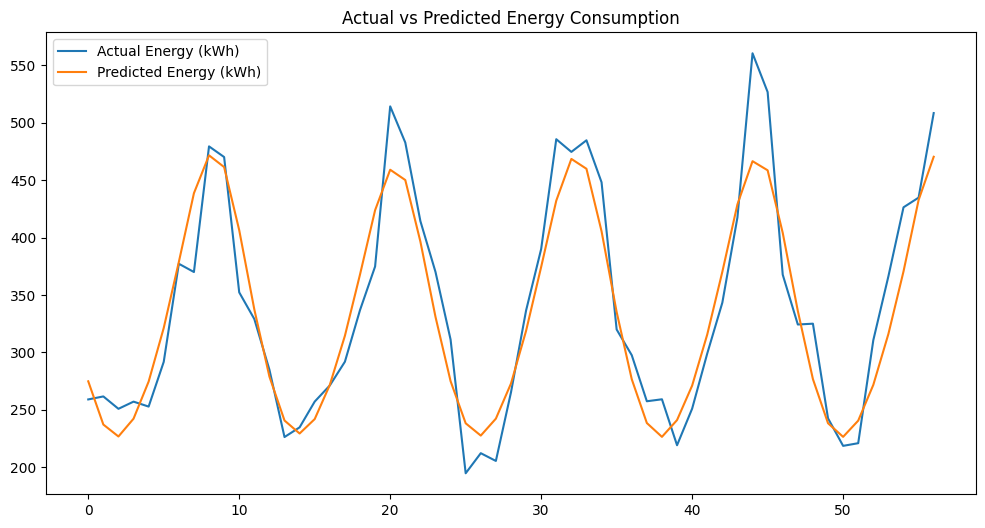

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
import keras_tuner as kt

# 1. Load and Prepare the Data
df = pd.read_csv('/content/drive/MyDrive/Mt-Gambier_SA.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Ensure 'date' is in datetime format and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample to monthly frequency
monthly_data = df['Energy (kWh)'].resample('M').mean()  # Resample energy data monthly
external_features = df[['GHI (W/m2)', 'DHI (W/m2)', 'Wet bulb temp (C)']].resample('M').mean()  # Resample external features monthly

# Combine the resampled data
monthly_data = pd.DataFrame(monthly_data)
monthly_data = monthly_data.merge(external_features, left_index=True, right_index=True)

# 2. Create Seasonal Features (sin/cos transformations) to capture seasonality
monthly_data['month'] = monthly_data.index.month
monthly_data['sin_month'] = np.sin(2 * np.pi * monthly_data['month'] / 12)
monthly_data['cos_month'] = np.cos(2 * np.pi * monthly_data['month'] / 12)

# 3. Create Lag Features to capture the autoregressive nature (similar to SARIMAX)
monthly_data['lag_1'] = monthly_data['Energy (kWh)'].shift(1)
monthly_data['lag_2'] = monthly_data['Energy (kWh)'].shift(2)
monthly_data['lag_3'] = monthly_data['Energy (kWh)'].shift(3)

# Drop missing values caused by lagging
monthly_data.dropna(inplace=True)

# 4. Prepare the features (X) and target (y)
X = monthly_data[['GHI (W/m2)', 'DHI (W/m2)', 'Wet bulb temp (C)', 'sin_month', 'cos_month', 'lag_1', 'lag_2', 'lag_3']]
y = monthly_data['Energy (kWh)']

# 5. Scale the features and target separately
feature_scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = feature_scaler.fit_transform(X)

target_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))

# 6. Create sequences for LSTM input
def create_sequences(data, window_size, forecast_horizon):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size - forecast_horizon + 1):
        X_seq.append(data[i:i + window_size])
        y_seq.append(data[i + window_size:i + window_size + forecast_horizon, 0])  # Predict next month's residual
    return np.array(X_seq), np.array(y_seq)

window_size = 12  # Using the past 12 months to predict the next month
forecast_horizon = 1  # Predict 1 month ahead

X_seq, y_seq = create_sequences(X_scaled, window_size, forecast_horizon)

# 7. Split the data into training and testing sets
train_size = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# 8. Define Hyperparameter Tuning Model
def build_model(hp):
    model = Sequential()

    # Add LSTM layers with tunable units and regularization
    for i in range(hp.Int('num_layers', 1, 4)):
        units = hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)
        dropout_rate = hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)
        l1 = hp.Float(f'l1_{i}', 0.0, 0.01, step=0.002)
        l2 = hp.Float(f'l2_{i}', 0.0, 0.01, step=0.002)

        model.add(
            LSTM(
                units=units,
                return_sequences=(i < hp.get('num_layers') - 1),
                activation='relu',
                kernel_regularizer=l1_l2(l1=l1, l2=l2),
                input_shape=(X_train.shape[1], X_train.shape[2]) if i == 0 else None
            )
        )
        model.add(Dropout(dropout_rate))

    # Dense layer
    model.add(Dense(units=forecast_horizon, activation='linear'))

    # Compile the model
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# 9. Instantiate Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='lstm_tuning'
)

# 10. Run the Hyperparameter Tuning Search
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# 11. Retrieve the Best Hyperparameters and Build the Best Model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# 12. Train the Best Model
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# 13. Evaluate the Best Model
test_predictions_scaled = best_model.predict(X_test)
test_predictions_rescaled = target_scaler.inverse_transform(test_predictions_scaled)
y_test_rescaled = target_scaler.inverse_transform(y_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_rescaled.flatten(), test_predictions_rescaled.flatten()))
r2 = r2_score(y_test_rescaled.flatten(), test_predictions_rescaled.flatten())
print(f"RMSE: {rmse:.4f}, R²: {r2:.4f}")

# 14. Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled.flatten(), label='Actual Energy (kWh)')
plt.plot(test_predictions_rescaled.flatten(), label='Predicted Energy (kWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()

# **Final LSTM Model**

<ipython-input-2-28b82ce09645>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Energy (kWh)'].resample('M').mean()  # Resample energy data monthly
<ipython-input-2-28b82ce09645>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  external_features = df[['GHI (W/m2)', 'DHI (W/m2)', 'Wet bulb temp (C)']].resample('M').mean()  # Resample external features monthly
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training data shape: X_train=(199, 12, 8), y_train=(199, 1)
Validation data shape: X_val=(42, 12, 8), y_val=(42, 1)
Testing data shape: X_test=(44, 12, 8), y_test=(44, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 64)              │          18,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,777 (202.25 KB)

 Trainable params: 51,777 (202.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.2136 - mae: 0.3855 - val_loss: 0.1180 - val_mae: 0.2913
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1152 - mae: 0.2877 - val_loss: 0.0750 - val_mae: 0.2328
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0719 - mae: 0.2143 - val_loss: 0.0930 - val_mae: 0.2426
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0750 - mae: 0.2202 - val_loss: 0.0638 - val_mae: 0.2108
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0631 - mae: 0.2166 - val_loss: 0.0559 - val_mae: 0.2098
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0570 - mae: 0.2074 - val_loss: 0.0439 - val_mae: 0.1748
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0429 - mae: 0.1683 - val_loss: 0.0284 - val_mae: 0.1471
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0301 - mae: 0.1447 - val_loss: 0.0140 - val_mae: 0.0938
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0146 - mae: 0.0980 - 

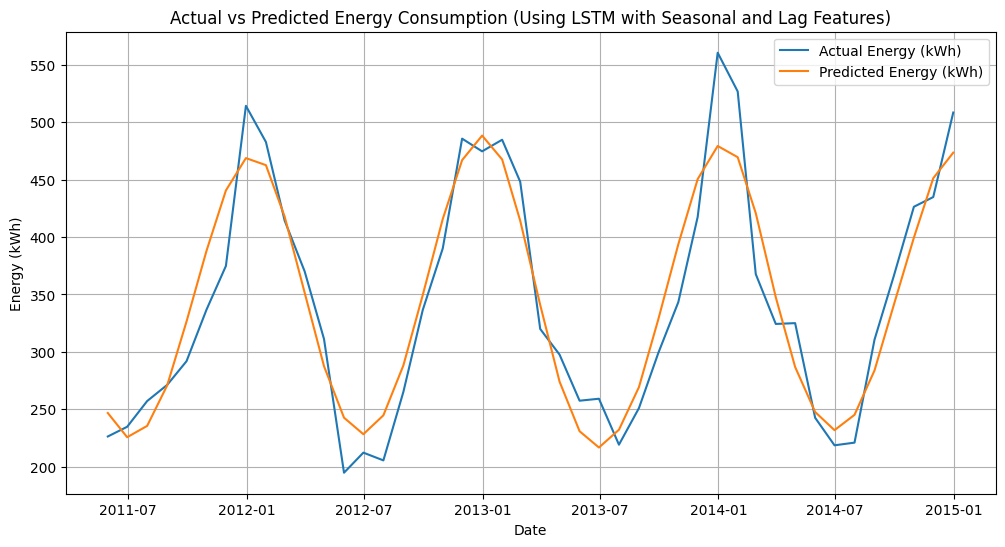

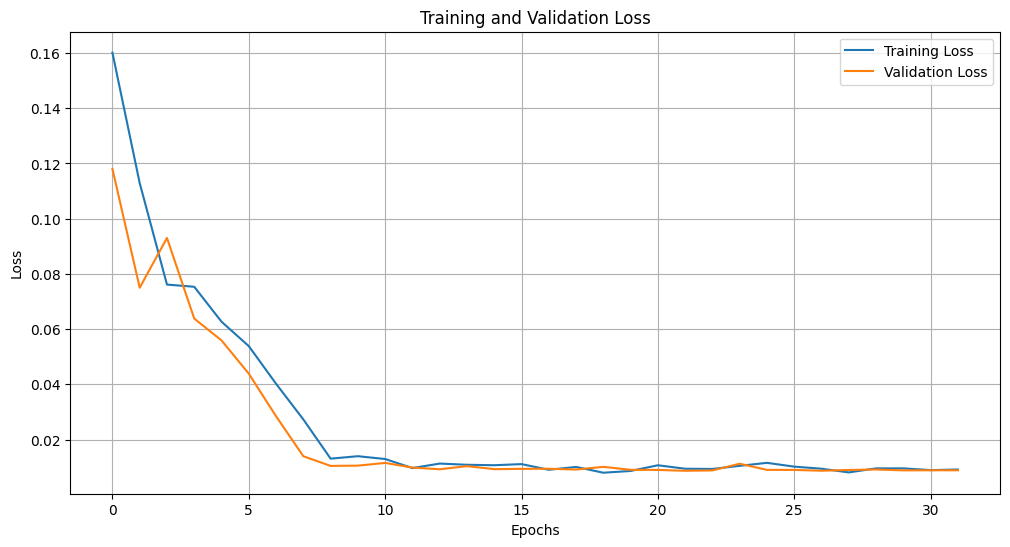

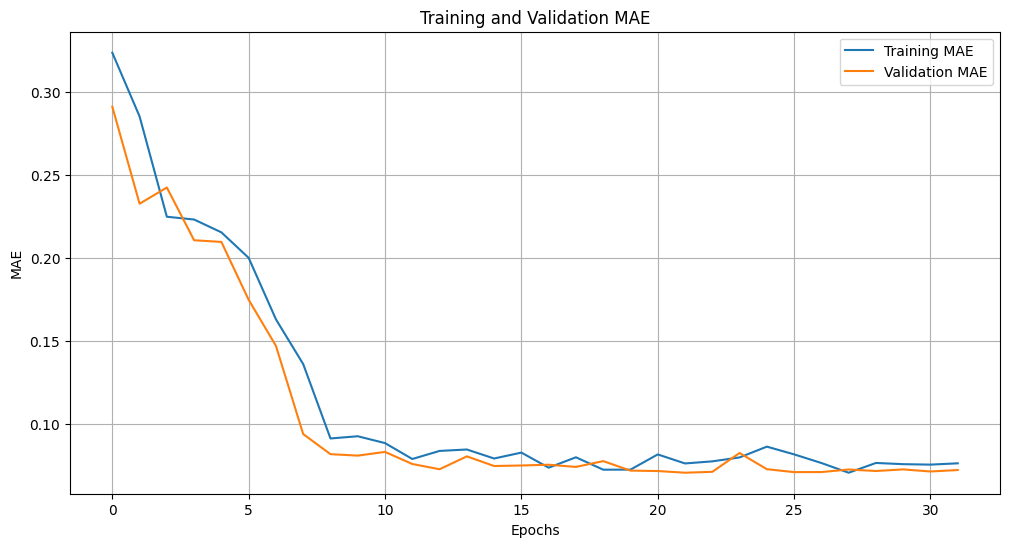

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load and Prepare the Data
df = pd.read_csv('/content/drive/MyDrive/Mt-Gambier_SA.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Ensure 'date' is in datetime format and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample to monthly frequency
monthly_data = df['Energy (kWh)'].resample('M').mean()  # Resample energy data monthly
external_features = df[['GHI (W/m2)', 'DHI (W/m2)', 'Wet bulb temp (C)']].resample('M').mean()  # Resample external features monthly

# Combine the resampled data
monthly_data = pd.DataFrame(monthly_data)
monthly_data = monthly_data.merge(external_features, left_index=True, right_index=True)

# 2. Create Seasonal Features (sin/cos transformations) to capture seasonality
monthly_data['month'] = monthly_data.index.month
monthly_data['sin_month'] = np.sin(2 * np.pi * monthly_data['month'] / 12)
monthly_data['cos_month'] = np.cos(2 * np.pi * monthly_data['month'] / 12)

# 3. Create Lag Features to capture the autoregressive nature
monthly_data['lag_1'] = monthly_data['Energy (kWh)'].shift(1)
monthly_data['lag_2'] = monthly_data['Energy (kWh)'].shift(2)
monthly_data['lag_3'] = monthly_data['Energy (kWh)'].shift(3)

# Drop missing values caused by lagging
monthly_data.dropna(inplace=True)

# 4. Prepare the features (X) and target (y)
X = monthly_data[['GHI (W/m2)', 'DHI (W/m2)', 'Wet bulb temp (C)', 'sin_month', 'cos_month', 'lag_1', 'lag_2', 'lag_3']]
y = monthly_data['Energy (kWh)']

# 5. Scale the features and target separately
feature_scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = feature_scaler.fit_transform(X)

target_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))

# 6. Create sequences for LSTM input
def create_sequences(data, window_size, forecast_horizon):
    X_seq, y_seq = [], []
    for i in range(len(data) - window_size - forecast_horizon + 1):
        X_seq.append(data[i:i + window_size])
        y_seq.append(data[i + window_size:i + window_size + forecast_horizon, 0])  # Predict next month's residual
    return np.array(X_seq), np.array(y_seq)

window_size = 12  # Using the past 12 months to predict the next month
forecast_horizon = 1  # Predict 1 month ahead

X_seq, y_seq = create_sequences(X_scaled, window_size, forecast_horizon)

# 7. Split the data into training, validation, and testing sets
train_size = int(0.7 * len(X_seq))
val_size = int(0.15 * len(X_seq))

X_train, X_val, X_test = X_seq[:train_size], X_seq[train_size:train_size + val_size], X_seq[train_size + val_size:]
y_train, y_val, y_test = y_seq[:train_size], y_seq[train_size:train_size + val_size], y_seq[train_size + val_size:]

# Confirm the sizes
print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation data shape: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

# 8. Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False, activation='tanh'),
    Dropout(0.2),
    Dense(forecast_horizon)  # Output layer for multi-step forecasting
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# 9. Implement Early Stopping and Train the LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# 10. Evaluate the model on the testing set
test_predictions_scaled = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
test_predictions_rescaled = target_scaler.inverse_transform(test_predictions_scaled)
y_test_rescaled = target_scaler.inverse_transform(y_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_rescaled.flatten(), test_predictions_rescaled.flatten()))
mape = np.mean(np.abs((y_test_rescaled.flatten() - test_predictions_rescaled.flatten()) / y_test_rescaled.flatten())) * 100
r2 = r2_score(y_test_rescaled.flatten(), test_predictions_rescaled.flatten())

# Print the metrics
print(f"RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, R²: {r2:.4f}")

# 11. Visualize the Results
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index[-len(y_test_rescaled):], y_test_rescaled.flatten(), label='Actual Energy (kWh)')
plt.plot(monthly_data.index[-len(y_test_rescaled):], test_predictions_rescaled.flatten(), label='Predicted Energy (kWh)')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.title('Actual vs Predicted Energy Consumption (Using LSTM with Seasonal and Lag Features)')
plt.legend()
plt.grid(True)
plt.show()

# 12. Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 13. Plot Training and Validation MAE
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

# **Comparison of Results**

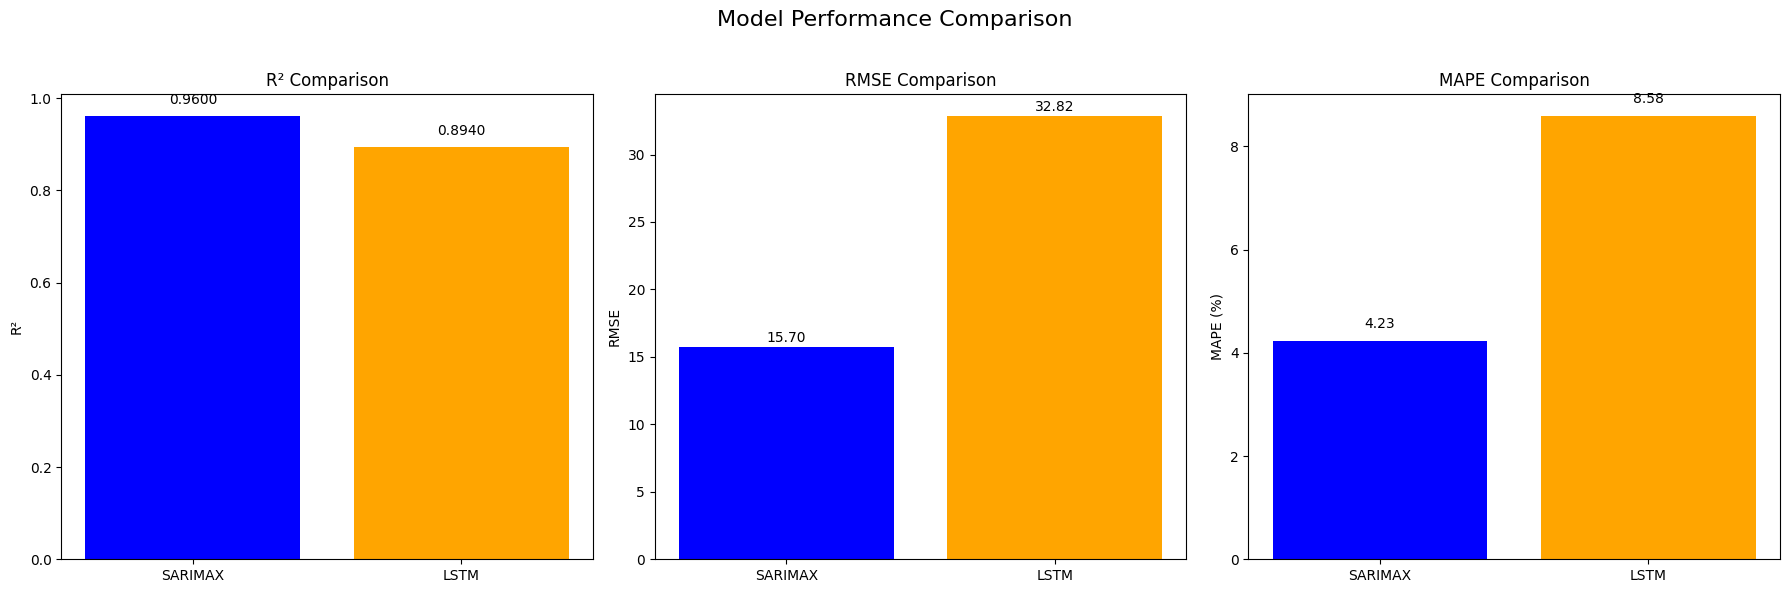

In [ ]:
import matplotlib.pyplot as plt

# Metrics for the ML model (SARIMAX)
rmse_ml = 15.70
mape_ml = 4.23
r2_ml = 0.96

# Metrics for the LSTM model
rmse_lstm = 32.82
mape_lstm = 8.58
r2_lstm = 0.8940

# Metrics
metrics_labels = ['R²', 'RMSE', 'MAPE']
sarimax_metrics = [r2_ml, rmse_ml, mape_ml]
lstm_metrics = [r2_lstm, rmse_lstm, mape_lstm]

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot R²
ax[0].bar(['SARIMAX', 'LSTM'], [r2_ml, r2_lstm], color=['blue', 'orange'])
ax[0].set_title('R² Comparison')
ax[0].set_ylabel('R²')
for i, v in enumerate([r2_ml, r2_lstm]):
    ax[0].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

# Plot RMSE
ax[1].bar(['SARIMAX', 'LSTM'], [rmse_ml, rmse_lstm], color=['blue', 'orange'])
ax[1].set_title('RMSE Comparison')
ax[1].set_ylabel('RMSE')
for i, v in enumerate([rmse_ml, rmse_lstm]):
    ax[1].text(i, v + 0.2, f'{v:.2f}', ha='center', va='bottom')

# Plot MAPE
ax[2].bar(['SARIMAX', 'LSTM'], [mape_ml, mape_lstm], color=['blue', 'orange'])
ax[2].set_title('MAPE Comparison')
ax[2].set_ylabel('MAPE (%)')
for i, v in enumerate([mape_ml, mape_lstm]):
    ax[2].text(i, v + 0.2, f'{v:.2f}', ha='center', va='bottom')

# Set a common title
plt.suptitle('Model Performance Comparison', fontsize=16)

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# **Saving Model**

In [ ]:
# Save the above model
model.save('lstm_model_0.8940_8.58_32.82.h5')